#### 6.5 Machine Learning : Clustering

##### Importing libraries & Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans #k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [5]:
%matplotlib inline

In [7]:
#Define Path
path = r'C:\Users\danac\Downloads\Achievement 6\Data\Cleaned Data\cleaned_data.xlsx'

In [9]:
#Importing Data
dataframe = pd.read_excel(path)

In [11]:
dataframe.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,United States of America,1,7,9,1,1,1,1,496,5,100.00,2012
1,2,Massachusetts Institute of Technology,United States of America,2,9,17,3,12,4,4,496,1,91.67,2012
2,3,Stanford University,United States of America,3,17,11,5,4,2,2,496,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,496,50,86.17,2012
4,5,California Institute of Technology,United States of America,4,2,29,7,37,22,22,496,18,85.21,2012


In [13]:
#Dropping categorical columns 
categorical_columns = ['institution', 'country', 'year']

In [15]:
#Dropping categorical columns 
data_cleaned = dataframe.drop(columns=categorical_columns)

In [17]:
data_cleaned.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
0,1,1,7,9,1,1,1,1,496,5,100.00
1,2,2,9,17,3,12,4,4,496,1,91.67
2,3,3,17,11,5,4,2,2,496,15,89.50
3,4,1,10,24,4,16,16,11,496,50,86.17
4,5,4,2,29,7,37,22,22,496,18,85.21


#### Applying The elbow technique

In [20]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [22]:
score = [kmeans[i].fit(data_cleaned).score(data_cleaned) for i in range(len(kmeans))] 
score

[-1216674585.8692179,
 -481669368.5999044,
 -346079906.47852427,
 -297067437.6907645,
 -270800932.02848125,
 -257469695.395967,
 -230698301.63876694,
 -211522379.67182648,
 -200528660.70001033]

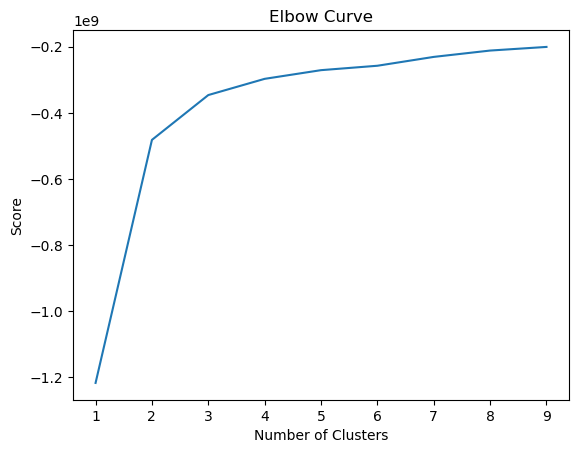

In [23]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### K-means clustering

In [27]:
#Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [29]:
#Fit the k-means object to the data.

kmeans.fit(data_cleaned)

KMeans(n_clusters=3)

In [31]:
data_cleaned['clusters'] = kmeans.fit_predict(data_cleaned)

In [33]:
data_cleaned.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,clusters
0,1,1,7,9,1,1,1,1,496,5,100.00,1
1,2,2,9,17,3,12,4,4,496,1,91.67,1
2,3,3,17,11,5,4,2,2,496,15,89.50,1
3,4,1,10,24,4,16,16,11,496,50,86.17,1
4,5,4,2,29,7,37,22,22,496,18,85.21,1


In [43]:
data_cleaned['clusters'].value_counts()

clusters
2    777
1    745
0    678
Name: count, dtype: int64

In [35]:
data_cleaned.to_excel(C:\Users\danac\Downloads\Achievement 6\Data\Cleaned Data\clusters.xlsx', index=False)

SyntaxError: invalid syntax (1805873537.py, line 1)

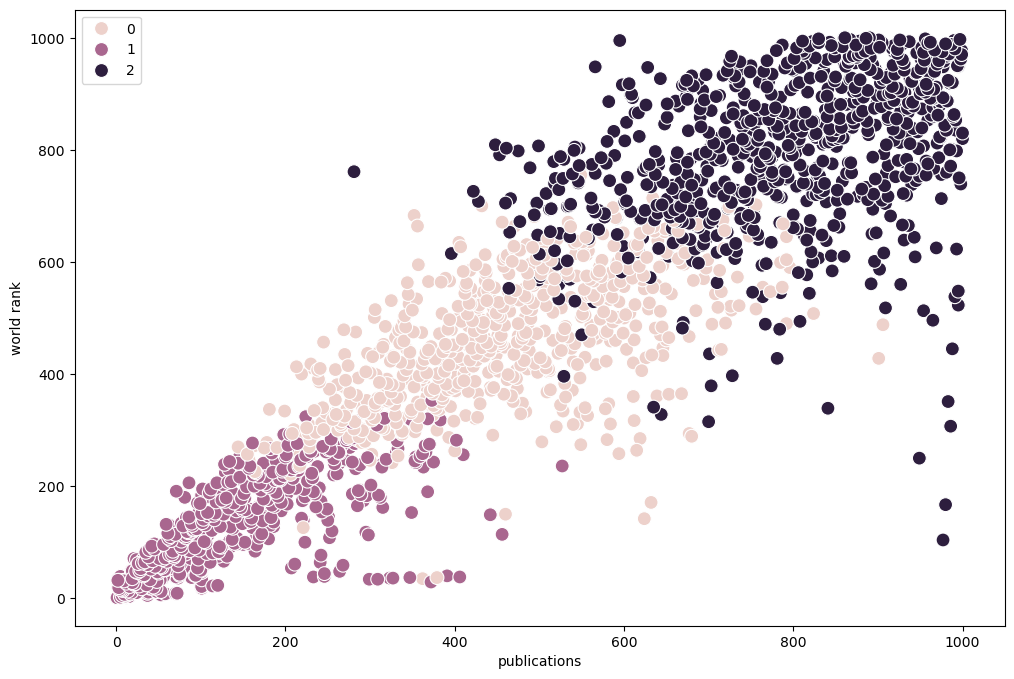

In [45]:
#Plot the clusters for the "world rank" and "publications" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_cleaned['publications'], y=data_cleaned['world_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('publications')
plt.ylabel('world rank') 
plt.show()

##### The general trend indicates that there is a positive correlation that explains why when a university's publications have a higher number in the ranking, they also obtain a better position in the world ranking. It is important to clarify that there are some atypical values ​​that show that although some publication rankings were high, the universities obtained a better position in the world ranking.

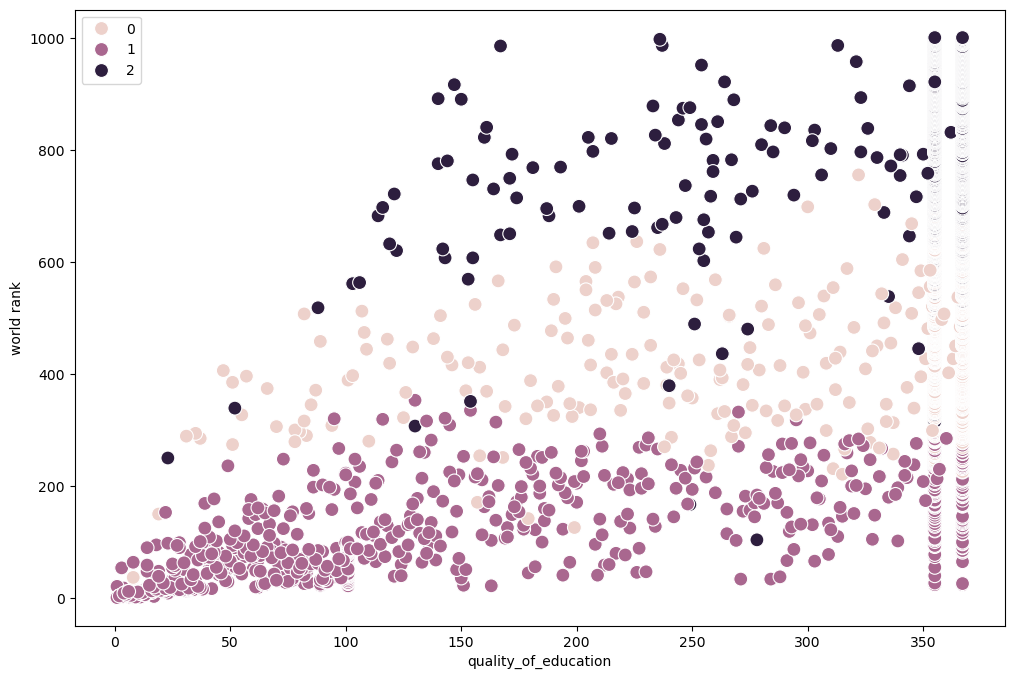

In [48]:
#Plot the clusters for the "world rank" and "quality of education" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_cleaned['quality_of_education'], y=data_cleaned['world_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('quality_of_education')
plt.ylabel('world rank') 
plt.show()

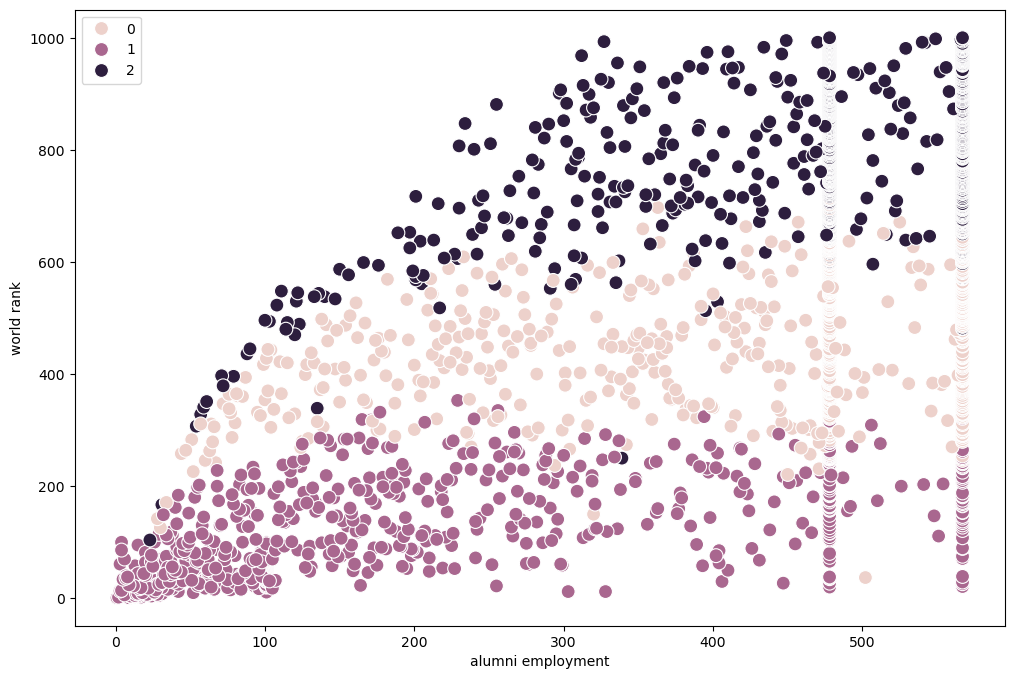

In [50]:
#Plot the clusters for the "world rank" and "alumni employment" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_cleaned['alumni_employment'], y=data_cleaned['world_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('alumni employment')
plt.ylabel('world rank') 
plt.show()

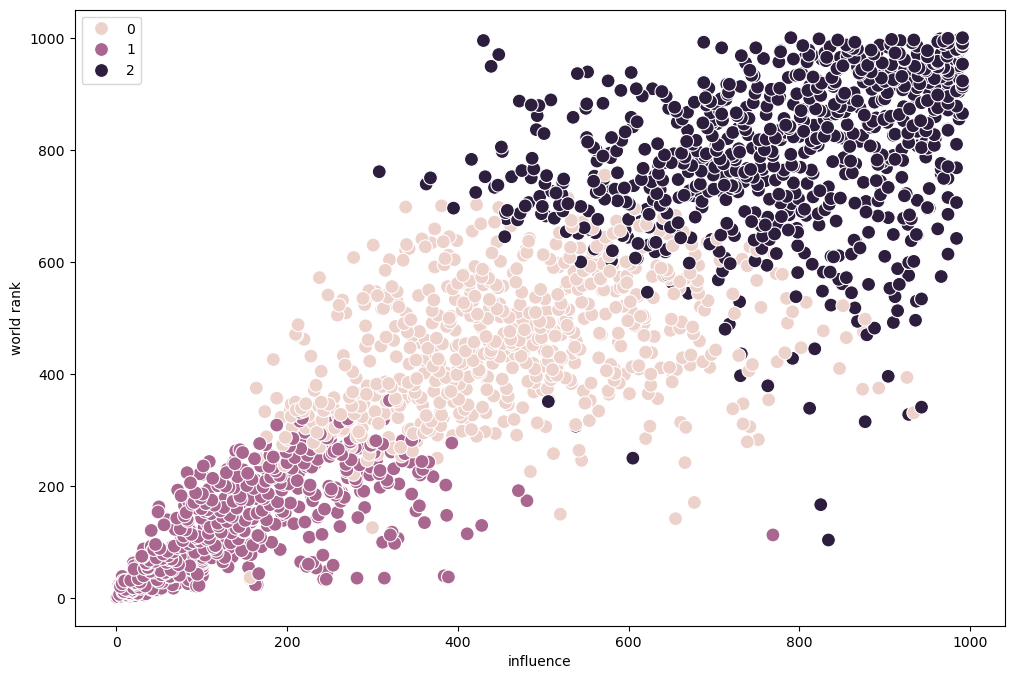

In [52]:
#Plot the clusters for the "world rank" and "influence" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_cleaned['influence'], y=data_cleaned['world_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('influence')
plt.ylabel('world rank') 
plt.show()

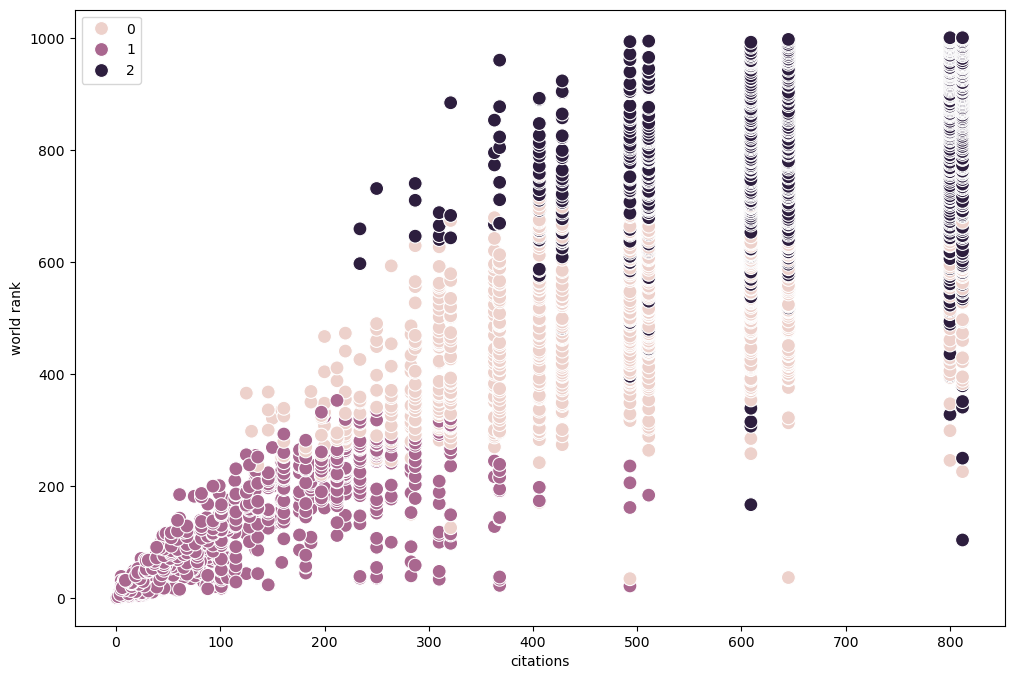

In [54]:
#Plot the clusters for the "world rank" and "citations" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_cleaned['citations'], y=data_cleaned['world_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('citations')
plt.ylabel('world rank') 
plt.show()